### Lecture 4 of Computational Aspectes of Machine Learning: course 2021-2022
If you have questions about this notebook contact Melissa Lopez at m.lopez@uu.nl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
!ls data

A_vs_A.npy A_vs_B.npy


Let's load the data that are stored in numpy arrays. These can be understood as correlation matrices between population A and B, and A against itself.
Note that population A has $1000$ samples while population B has $3265$.

In [3]:
# Note that we drop 2 matrices for simplicity. 
#These matrices that we drop are ids of the samples, but we do not need them.

A_vs_B = np.load('./data/A_vs_B.npy')[:, :, :3]
A_vs_A = np.load('./data/A_vs_A.npy')[:, :, :3]

print(A_vs_B.shape, A_vs_A.shape)

(1000, 3265, 3) (1000, 1000, 3)


From their shapes we can observe that they have 3 dimensions. However, we want to get the average of A over B for A_vs_B, and the average of A over A for A_vs_A. Their shapes transform as:

A_vs_B $\longrightarrow$ $(A\text{ }samples, B\text{ }samples, metrics)$  $\longrightarrow$ $(A\text{ }samples, metrics)$

A_vs_A $\longrightarrow$ $(A\text{ }samples, A\text{ }samples, metrics)$  $\longrightarrow$ $(A\text{ }samples, metrics)$

What are these $metrics$? They are similarity distance. For simplicity let's say $metrics = $ {$dist1$, $dist2$, $dist3$}

We want to check if A_vs_A and A_vs_B are linearly correlated. Let's do that for $dist1$

In [4]:
# We average along dim 1. In that way x and y should be the same shape.

x = np.mean(A_vs_A, axis=1)[:, 0] 
y = np.mean(A_vs_B, axis=1)[:, 0] 

print(x.shape, y.shape)

(1000,) (1000,)


We want to fit x and y variales to a line, so we use least squares estimate. We use Scipy lineare regression (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

In [5]:
m, n, R, _, _ = stats.linregress(x, y)
print(m, n, R)

0.8988249130413917 0.0064757515395796016 0.9925763297325655


We are only interested in the slope $m$, intercept $n$ and Pearson coefficient $R$. Pearson coefficient is almost one meaning that x and y are strongly linearly correlated. Let's plot the results.

(0.01, 0.15)

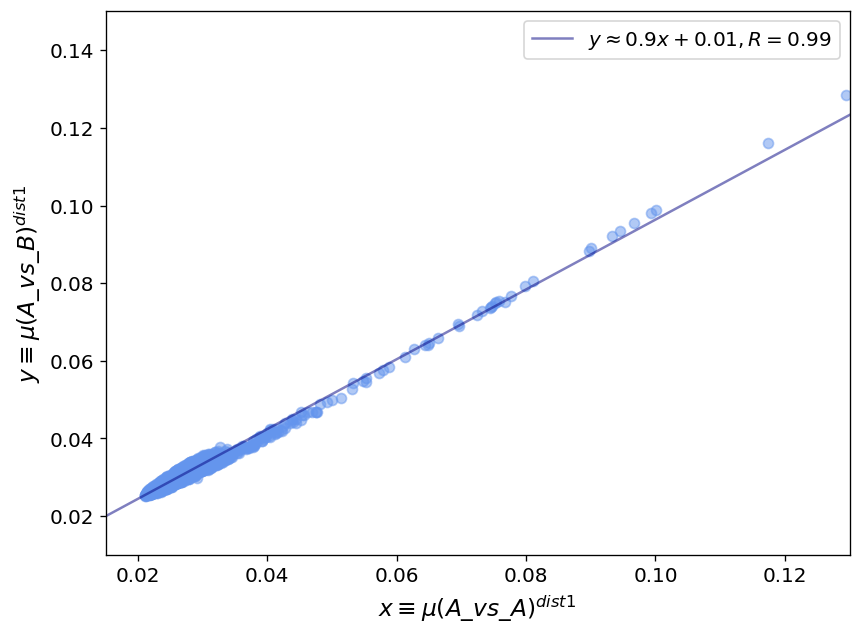

In [6]:
# We define X to plot the line.
X = np.array([0, 0.15])

fig = plt.figure(figsize=(8,6), dpi=120)
plt.scatter(x, y, alpha=0.5, c='cornflowerblue')
plt.plot(X,  X* m + n, c='navy', alpha=0.5,
        label=r'$y \approx '+str(np.round(m,2))+' x +'+str(np.round(n,2))+', R =$'+str(np.round(R,2)))
plt.legend(fontsize=12)
plt.xticks(fontsize=12), plt.yticks(fontsize=12)
plt.xlabel('$x \equiv \mu(A\_vs\_A)^{dist1}$', fontsize=14)
plt.ylabel('$y \equiv \mu(A\_vs\_B)^{dist1}$', fontsize=14)
plt.xlim(0.015, 0.13)
plt.ylim(0.01, 0.15)

Can you do the same for $dist2$ and $dist3$? How are these magnitudes similar or different to $dist1$? Can you relate them some how?